# Try to extract density modulation signal

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, "/Users/sst/project/Myscripts")

from helper import load_fgr
from myplot import *

## load data in data loader

In [2]:
DF = pd.read_csv("data_info.csv", index_col=0)
print(DF.index)
print(DF.columns)

Index(['JBNP31', 'JBNP32L', 'JBNP32', 'JBNP33L', 'JBNP33'], dtype='object', name='sample')
Index(['iq', 'sq', 'fq', 'gr', 'fgr0', 'fgr1', 'fgr2', 'csv0', 'csv1', 'csv2',
       'color', 'fgr3', 'csv3', 'fgr4', 'csv4', 'fgr_ana', 'csv_ana',
       'fgr_pbo', 'csv_pbo', 'fgr_rut', 'csv_rut', 'fgr_bro', 'csv_bro',
       'csv_ana_fix', 'fgr_ana_fix', 'moving_pearson', 'pearson_25A',
       'csv_twop', 'fgr_twop', 'csv_proxy', 'fgr_proxy'],
      dtype='object')


In [3]:
samples = DF.index.to_list()
rs, _, _, gdiffs = load_fgr(DF.loc[:, "fgr_twop"])
data = [tup for tup in zip(samples, rs, gdiffs)]

## visualize residual curves

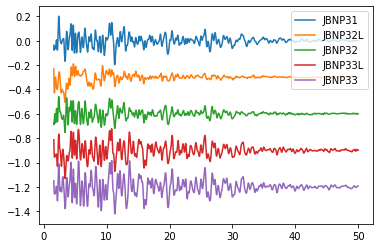

In [4]:
shift = 0.
for sample, r, gdiff in data:
    plt.plot(r, gdiff + shift, label=sample)
    shift -= .3
plt.legend(loc=1)
plt.show()

## JBNP32L

In [5]:
sample, r, gdiff = data[1]

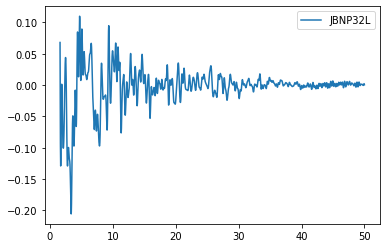

In [6]:
plt.plot(r, gdiff, label=sample)
plt.legend(loc=1)
plt.show()

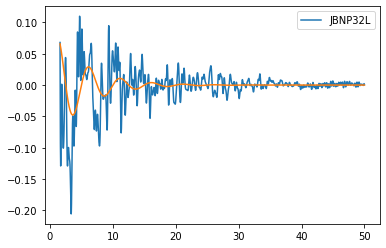

In [37]:
def func(x, wl, amp, dec, x0):
    return amp * np.exp(-dec * x) * np.sin(2 * np.pi * (x - x0) / wl)

plt.plot(r, gdiff, label=sample)
plt.legend(loc=1)

gfunc = func(r, 5, 0.1, 0.2, 0.0)
plt.plot(r, gfunc)
plt.show()

In [38]:
from scipy.optimize import fmin

def gen_cost_func(r, gdiff, func):
    def _cost_func(params):
        return np.sum((gdiff - func(r, *params)) ** 2)
    return _cost_func

Optimization terminated successfully.
         Current function value: 2.461090
         Iterations: 253
         Function evaluations: 422
Optimized parameters:
wl   4.78
amp  0.18
dec  0.19
x0   -0.57


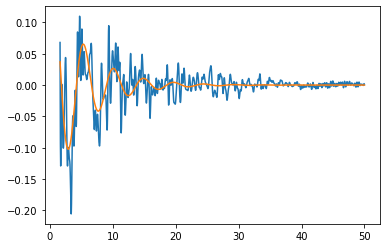

In [40]:
cost_func = gen_cost_func(r, gdiff, func)
opt_params = fmin(cost_func, (5, 0.1, 0.2, 0.0))
param_names = ["wl", "amp", "dec", "x0"]
print("Optimized parameters:")
for param_name, opt_param in zip(param_names, opt_params):
    print(f"{param_name:5s}{opt_param:.2f}")

gopt = func(r, *opt_params)
plt.plot(r, gdiff)
plt.plot(r, gopt)
plt.show()

## JBNP33L (use method for JBNP32L)

In [42]:
sample, r, gdiff = data[3]

Optimization terminated successfully.
         Current function value: 11.490980
         Iterations: 216
         Function evaluations: 359
Optimized parameters:
wl   4.73
amp  0.12
dec  0.18
x0   -0.49


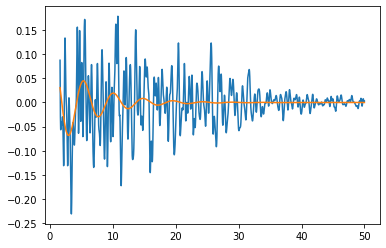

In [45]:
cost_func = gen_cost_func(r, gdiff, func)
opt_params = fmin(cost_func, (5, 0.1, 0.2, 0.0))
param_names = ["wl", "amp", "dec", "x0"]
print("Optimized parameters:")
for param_name, opt_param in zip(param_names, opt_params):
    print(f"{param_name:5s}{opt_param:.2f}")

gopt = func(r, *opt_params)
plt.plot(r, gdiff)
plt.plot(r, gopt)
plt.show()